In [18]:
import base64
import numpy as np
import json
import codecs
from Crypto.Util.number import long_to_bytes
from pwn import *
from PIL import Image, ImageChops, ImageFilter
from matplotlib.pyplot import imshow

In [11]:
#XOR Starter
s = 'label'
print("crypto{" + "".join([chr(13^ord(x)) for x in s]) + "}")

crypto{aloha}


In [12]:
#XOR Properties
KEY1 = int('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313', 16)
KEY2_hat_KEY1 = int('37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e', 16)
KEY2_hat_KEY3 = int('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1', 16)
FLAG_hat_KEY1_hat_KEY3_hat_KEY2 = int('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf', 16)

FLAG = FLAG_hat_KEY1_hat_KEY3_hat_KEY2 ^ KEY1 ^ KEY2_hat_KEY3
long_to_bytes(FLAG)

b'crypto{x0r_i5_ass0c1at1v3}'

In [13]:
#Favourite byte
x_hex = '73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d'
x = int(x_hex, 16)
x_bytes = long_to_bytes(x)
for i in range(0,255):
    check_xor_byte = "".join([chr(i ^ b) for b in x_bytes])
    if "crypto" in check_xor_byte:
        print(check_xor_byte)

crypto{0x10_15_my_f4v0ur173_by7e}


In [14]:
#You either know, XOR you don't
def xor_bytes_to_string(b1, b2):
    return "".join([chr(x^y) for x,y in zip(b1, b2)])

x_hex = '0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104'
len_solution = len(x_hex)//2
x = int(x_hex, 16)
x_bytes = long_to_bytes(x)

#check first part of key
first_part = 'crypto{'
first_part +=  "A"*(len_solution - len(first_part)-1) + '}'
first_part_bytes = first_part.encode('ascii')

print(xor_bytes_to_string(x_bytes, first_part_bytes))

key = 'myXORkey'
key = key*6
key_bytes = key.encode('ascii')
print(xor_bytes_to_string(x_bytes, key_bytes))


myXORke	Jg`>fuoVOFK}Qdg`>fuoVOF?guT@y
crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}


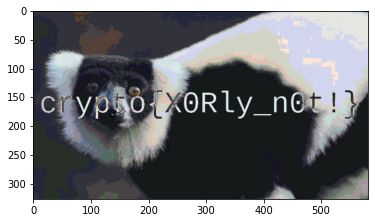

In [28]:
# Lemur XOR
with Image.open("data/flag.png") as flag_im, Image.open("data/lemur.png") as lemur_im:
    lemur_im_np = np.array(lemur_im)
    flag_im_np = np.array(flag_im)
    xor_np  = np.bitwise_xor(lemur_im_np, flag_im_np)
    imshow(xor_np)